<div style="position: relative; text-align: center;">

<img src="./healthcare1.jpg" style="width:100%; height:350px; object-fit:cover; border-radius:15px;">

<div style="
    position:absolute;
    top:20%;
    left:50%;
    transform:translate(-50%,-50%);
    color:white;
    background:rgba(0,0,0,0.6);
    padding:30px 40px;
    border-radius:15px;
    text-align:center;
">

<h1 style="margin:0;"> Healthcare Premium Prediction</h1>
<h2>Machine Learning Project</h2>
<h3 style="margin:5px 0 0 0;">By Tanmay Pakori</h3>

</div>
</div>


In [302]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h2 align="center" style="color:navy">Data Loading</h2>

In [303]:
# loading dataset
df = pd.read_excel('premiums_young_with_gr.xlsx')

# no. of rows and columns in dataset
print(df.shape)

# first few rows of dataset
df.head()

(20096, 14)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [304]:
# see columns 
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [305]:
# converting column names into python snake case convention
df.columns = df.columns.str.replace(' ','_').str.lower()
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


<h2 align="center" style="color:navy">Exploratory Data Analysis & Data Cleaning</h2>

In [306]:
# check null values in dataset
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [307]:
# as no. of null values are low in our 50000 rows dataset we drop the null values
df.dropna(inplace=True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [308]:
# checks for duplicate rows in a DataFrame
df.duplicated().sum()

np.int64(0)

In [309]:
# statistical summary of numerical columns
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [310]:
# here we can see that max age is 356 which is not possible, number of dependents can not be negative, we need to check max income also

In [311]:
# checking no. of dependents values which are negative
df[df.number_of_dependants<0].shape

(22, 14)

In [312]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [313]:
# so there might be error while typing above values, with discussion with data engineer and manager we will convert this negative values into positive
df['number_of_dependants'] = df['number_of_dependants'].abs()

df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


## 1. Numeric Columns

### Univariate Analysis: Numeric Columns

In [314]:
# find the numeric columns
numeric_columns = df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

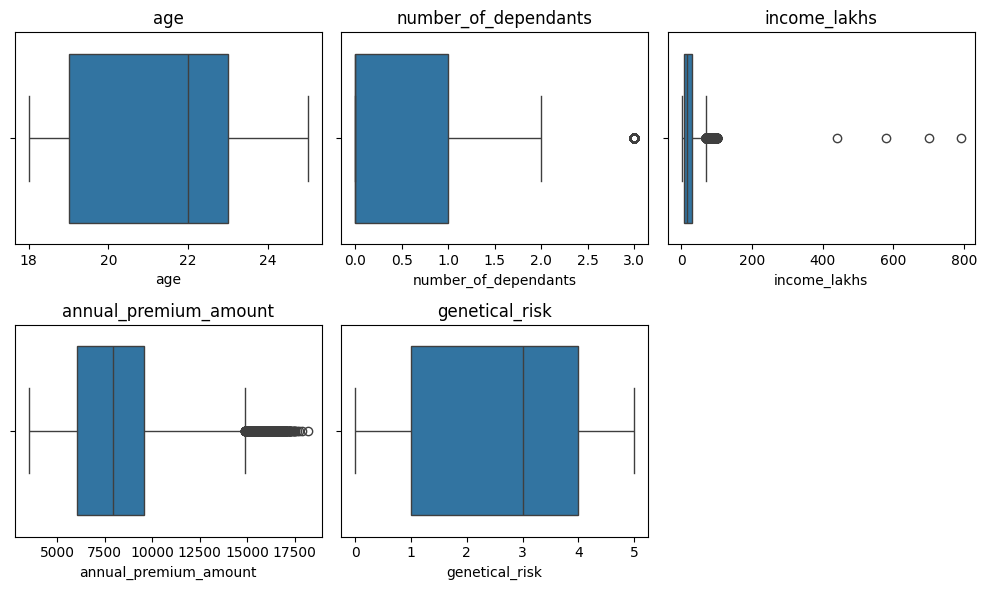

In [315]:
# detect outliers in all the numeric columns
plt.figure(figsize=(10,6))

for i, col in enumerate(numeric_columns[:5]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Outlier Treatment: Age Column

In [316]:
df[df.age>100]['age'].unique()

array([], dtype=int64)

In [317]:
# so based on intutition and discussion with manager age values greater than 100 were removed
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


### Outlier Treatment: Income Column

In [318]:
def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR= Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return lower_bound,upper_bound

In [319]:
get_iqr_bounds(df1.income_lakhs)

(-31.5, 68.5)

In [320]:
# here we dont need to worry about lower bound as minimum income value is 1. 
# but we should treat income greater than our greater bound, with the discussion with managers or based on domain knowledge.
# a person can have income 67 lakhs per annum
# so we created new thresold of 1cr income with business understanding
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

np.float64(100.0)

In [321]:
# check how many persons has annual income greater than 1Cr
df1[df1.income_lakhs>quantile_thresold].shape

(4, 14)

In [322]:
# only 10 persons have income greater than 1Cr so with discussion with manager removed this 10 entries (treated them as outliers)
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
print(df2.shape)
df2.describe()

(20086, 14)


,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


In [323]:
# we are not treating outliers in annual_premium_amount as there are only 2 values and premium amount can be that higher than Q3

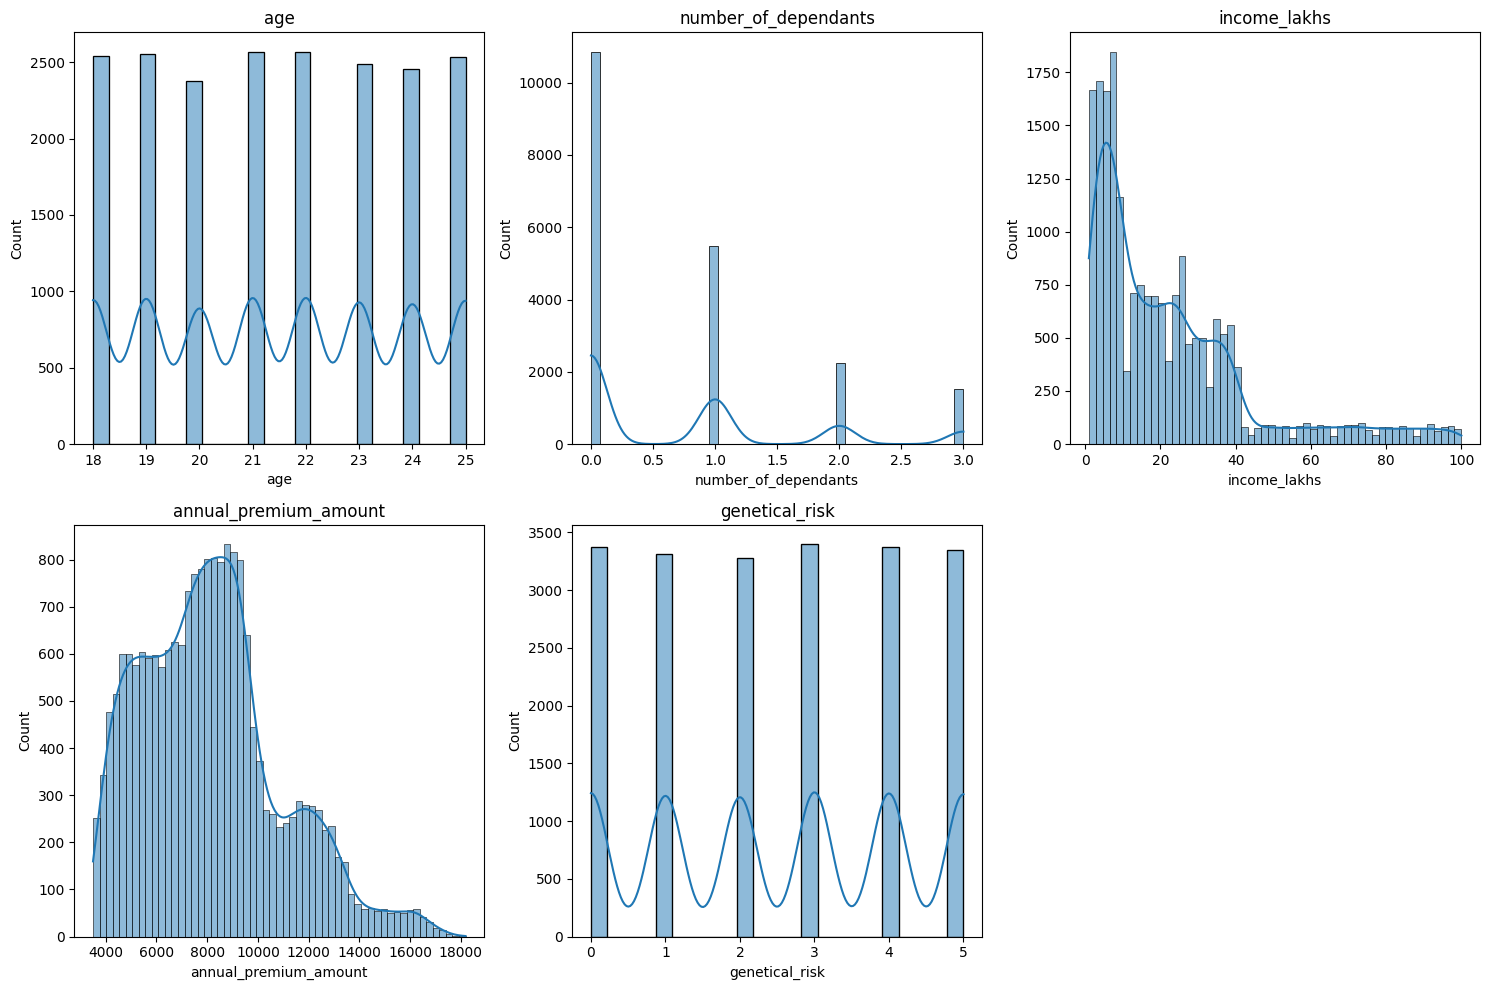

In [324]:
# plotting bar graph with kde plot of all numerical columns to see distribution
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the size to ensure plots are not squeezed

for i, column in enumerate(numeric_columns):
    # Locating the correct subplot using integer division and modulus
    ax = axs[i // 3, i % 3]  # Row index is i//3, column index is i%3
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

# If the last subplot axis is unused, you can turn it off
if len(numeric_columns) % 3 != 0:
    for j in range(len(numeric_columns), 6):  # This will disable any unused subplots
        axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

### Bivariate Analysis: Numeric Columns

In [325]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

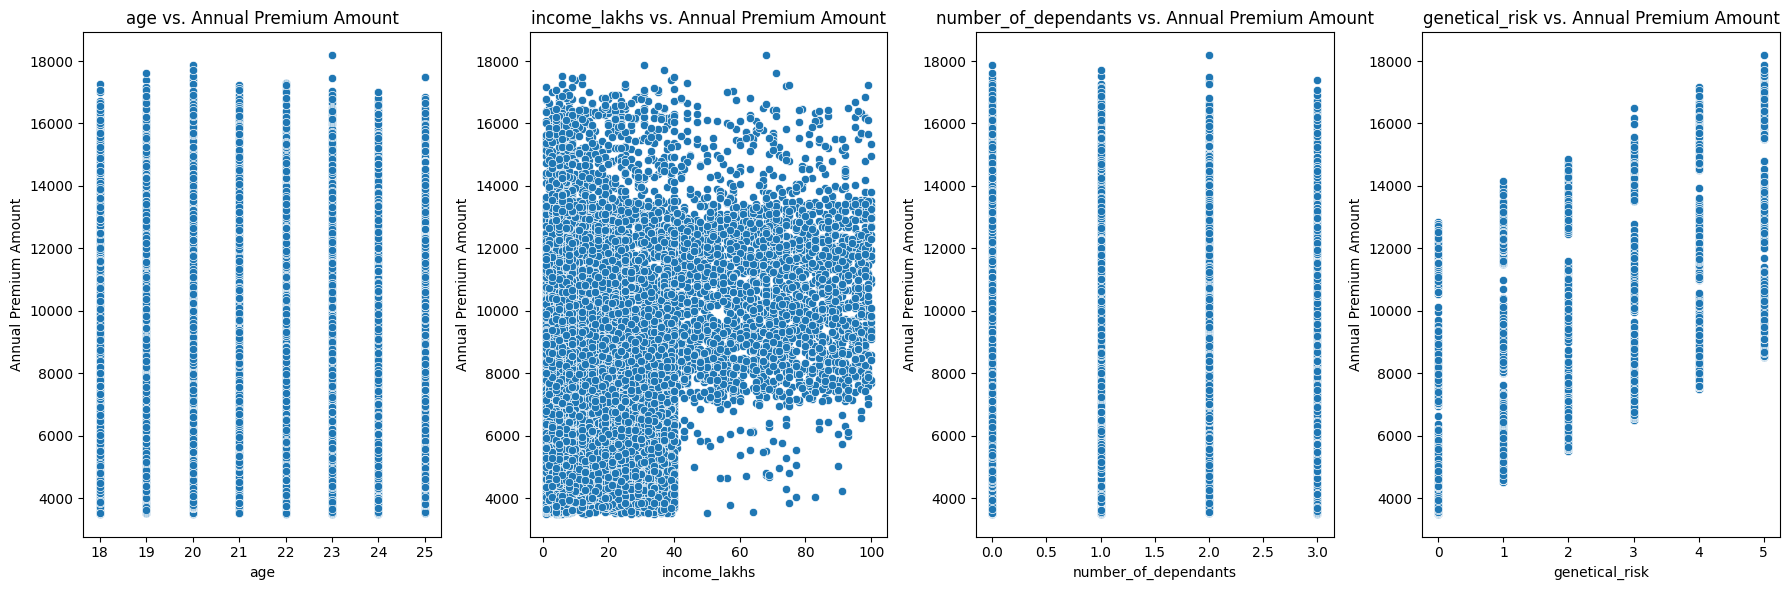

In [326]:
# plotting graphs to see distribution of independent columns w.r.t dependent columns (annual premium amount)
numeric_features = ['age', 'income_lakhs', 'number_of_dependants','genetical_risk']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

## 2. Categorical Columns

In [327]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col,":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [328]:
# in above unique values in smoking_status column we can see that few values have same meaning so will make values uniform
df2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)

df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

### Univariate Analysis

In [329]:
# checking balance of dataset in gender column
df2['gender'].value_counts()

gender
Male      11055
Female     9031
Name: count, dtype: int64

In [330]:
pct_count = df2['gender'].value_counts(normalize=True) #percentage of data distribution
pct_count

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

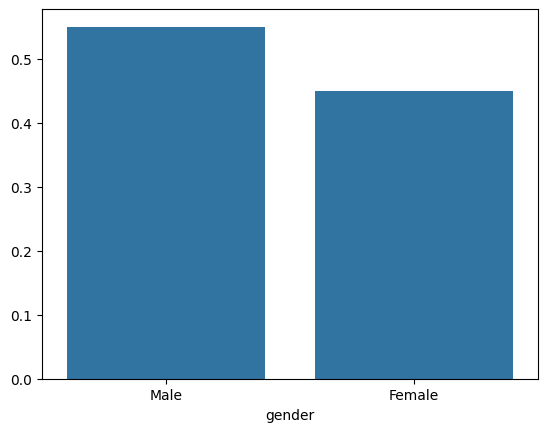

In [331]:
# visual representation of gender column
sns.barplot(x=pct_count.index,y=pct_count.values)
plt.show()

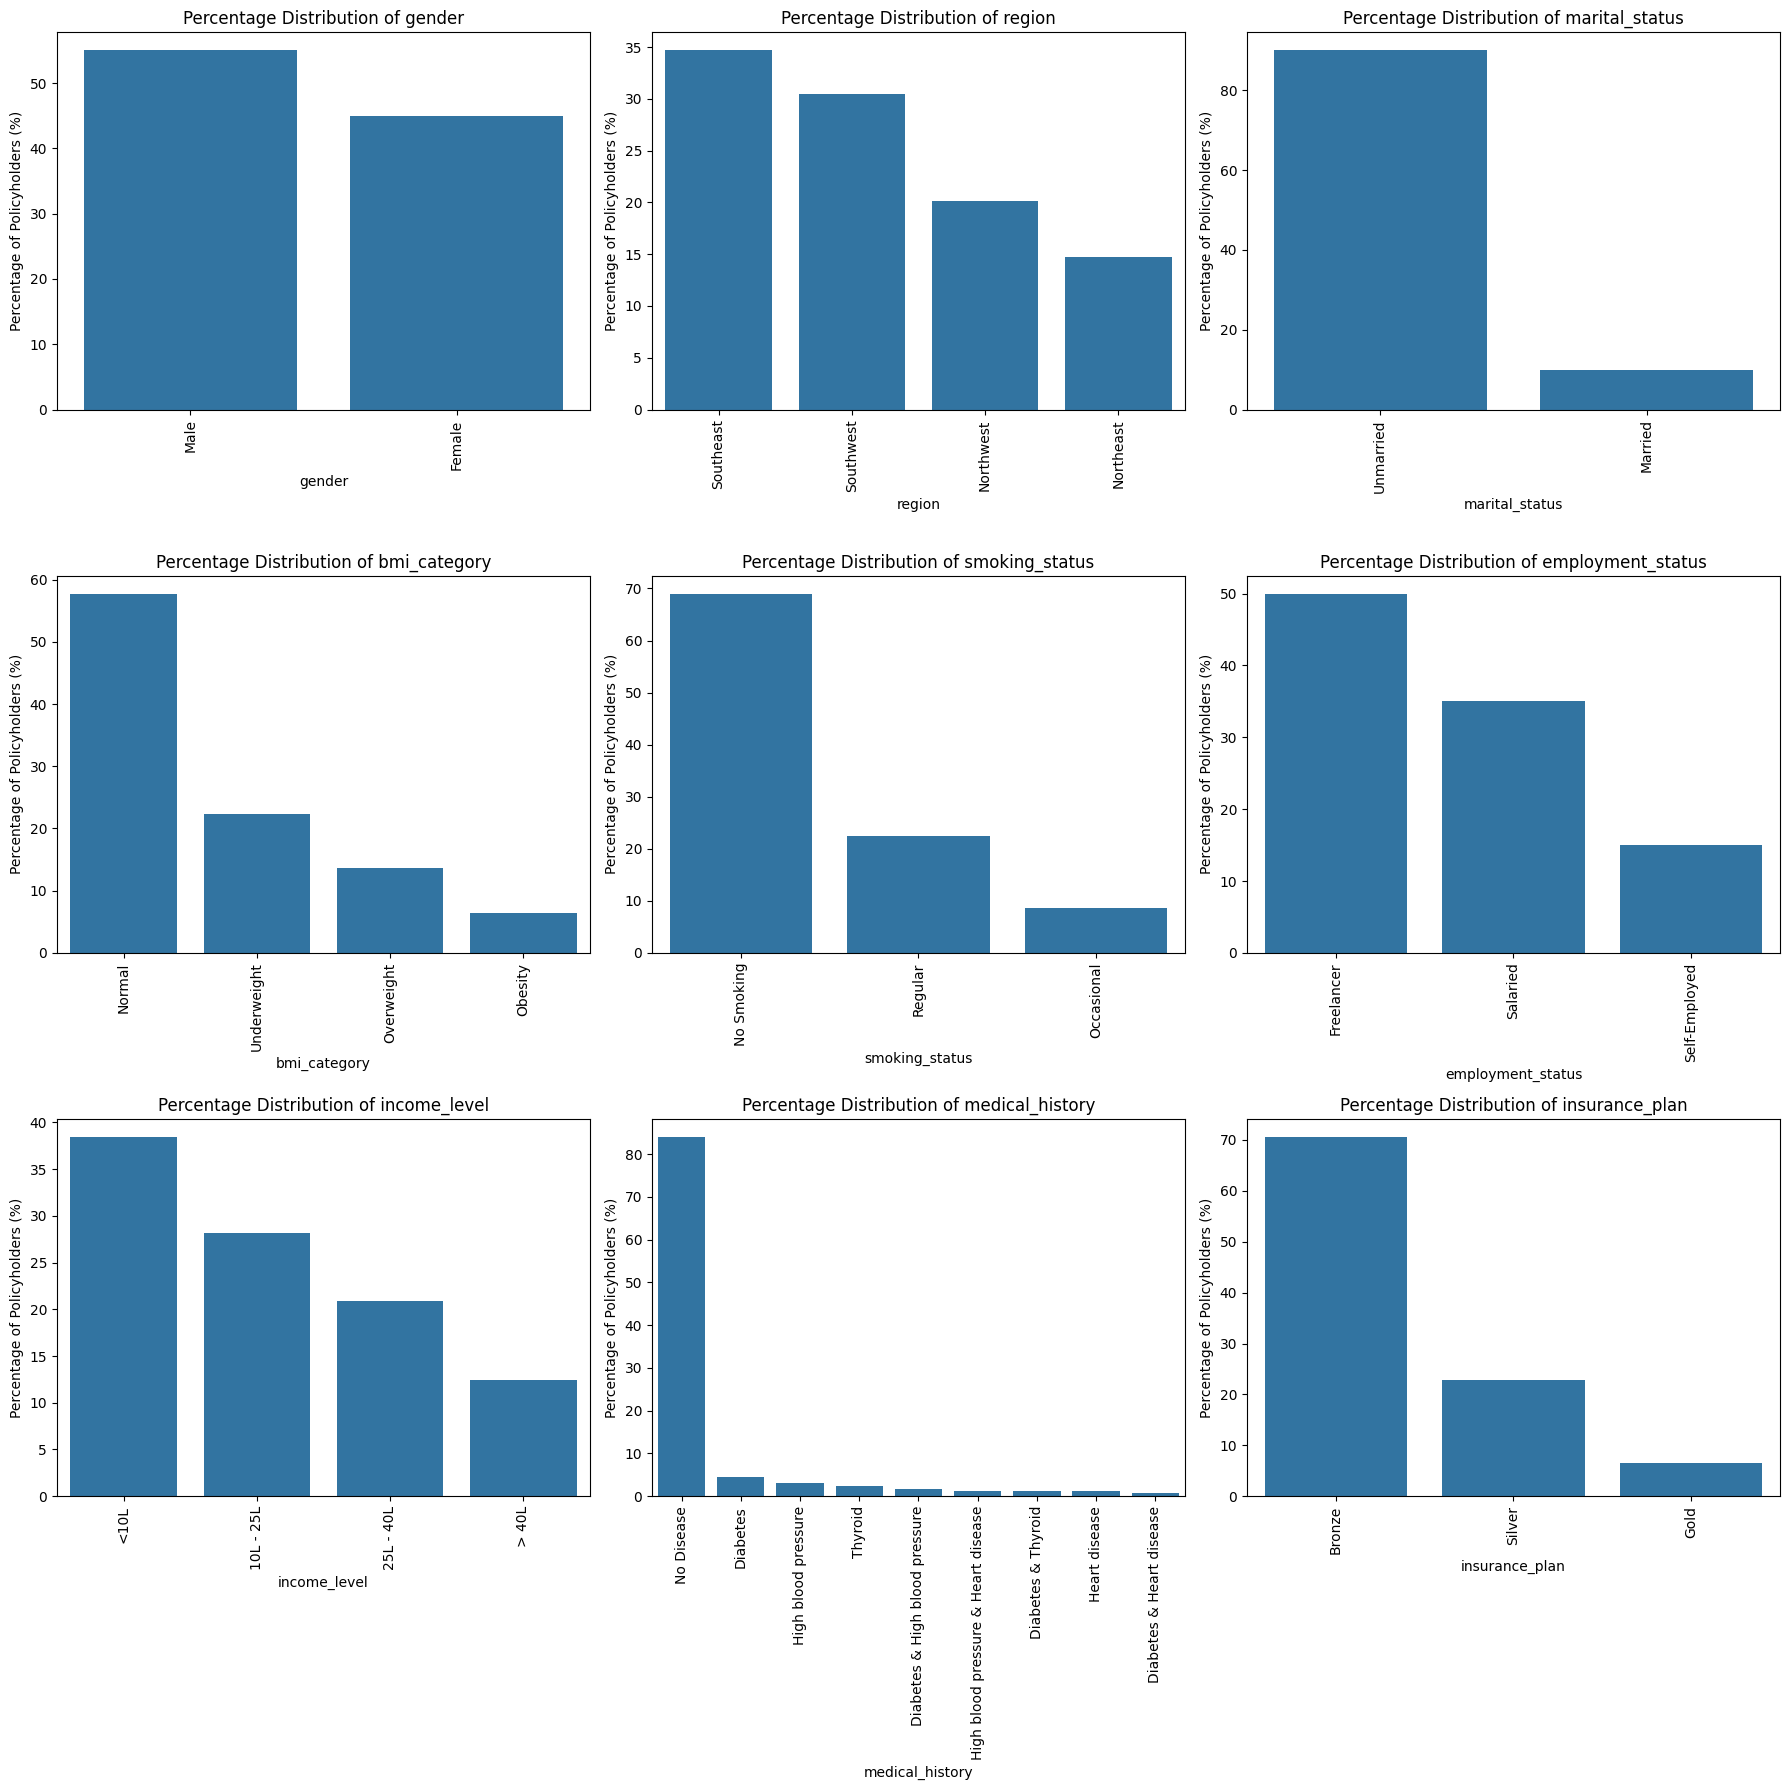

In [332]:
# visual representation of all categorical columns
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

### Bivariate Analysis

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


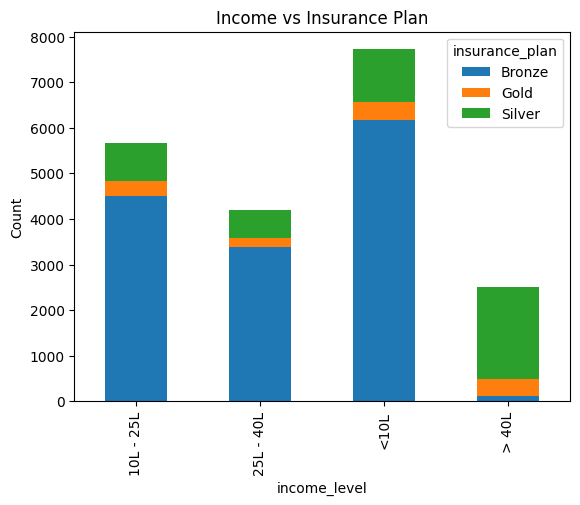

In [333]:
# Cross-tabulation of income level and insurance plan
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab

print(crosstab)

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Insurance Plan')
plt.ylabel('Count')
plt.show()

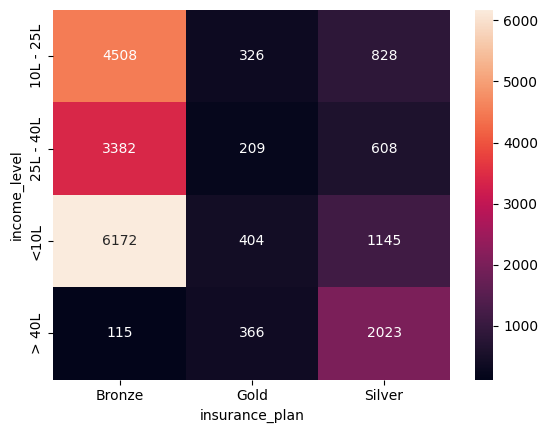

In [334]:
# visual representation of crosstab using heatmap
sns.heatmap(crosstab,annot=True,fmt='d')
plt.show()

<h2 align="center" style="color:navy">Feature Engineering</h2>

In [335]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [336]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [337]:
# healthcare premium is affected by medical history so we need to assign risk score for various disease
risk_scores = {
    
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
    
}
# seperate combined disease ('Diabetes & High blood pressure') into two seperate disease 
df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower())
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
8389,21,Male,Northeast,Unmarried,1,Normal,No Smoking,Freelancer,<10L,3,No Disease,Bronze,4152,0,no disease,None
17679,21,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,23,No Disease,Bronze,4842,1,no disease,None
18106,23,Male,Northeast,Unmarried,2,Normal,No Smoking,Freelancer,25L - 40L,25,No Disease,Bronze,8813,5,no disease,None
11614,21,Male,Southeast,Unmarried,0,Obesity,No Smoking,Salaried,<10L,1,No Disease,Bronze,6470,2,no disease,None
11641,20,Male,Northeast,Unmarried,1,Overweight,Regular,Freelancer,<10L,2,No Disease,Bronze,7805,3,no disease,None


In [338]:
# fill null values with none in disease1 & disease2 columns
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')

df2['total_risk_score']=0                #created new column for total risk score
for disease in ['disease1','disease2']:
    df2['total_risk_score']+=df2[disease].map(risk_scores)

In [339]:
df2.sample(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
6513,18,Male,Southwest,Unmarried,0,Overweight,No Smoking,Salaried,25L - 40L,27,No Disease,Bronze,9048,5,no disease,none,0
17887,20,Male,Southwest,Married,2,Obesity,No Smoking,Salaried,<10L,6,No Disease,Bronze,9802,5,no disease,none,0
12957,18,Female,Southeast,Unmarried,1,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,7571,0,no disease,none,0


In [340]:
# scaling total_risk_score column using min max scaler
max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_risk_score']=(df2['total_risk_score']-min_score)/(max_score-min_score)
df2.sample(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
19930,23,Female,Southwest,Unmarried,0,Obesity,No Smoking,Self-Employed,25L - 40L,34,No Disease,Bronze,6481,2,no disease,none,0,0.0
19591,19,Male,Northwest,Unmarried,1,Normal,No Smoking,Salaried,<10L,1,No Disease,Silver,9217,2,no disease,none,0,0.0
4890,24,Male,Southwest,Unmarried,1,Normal,No Smoking,Salaried,10L - 25L,14,No Disease,Bronze,8019,4,no disease,none,0,0.0


### Encoding Text Columns

In [341]:
# ordinal encoding on insurance plan column as order is important
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [342]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df2.insurance_plan.unique()

array([2, 1, 3])

In [343]:
# ordinal encoding on income level column as order is important
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})


In [344]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [345]:
# remaining categorical columns are nominal so apply one hot encoding and stored in new dataframe (df3)
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0


In [346]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount',
       'genetical_risk', 'disease1', 'disease2', 'total_risk_score',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

### Feature Selection

In [347]:
# we created normalised risk score column so now we can drop belowed columns
df4=df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


### Calculate VIF for Multicolinearity

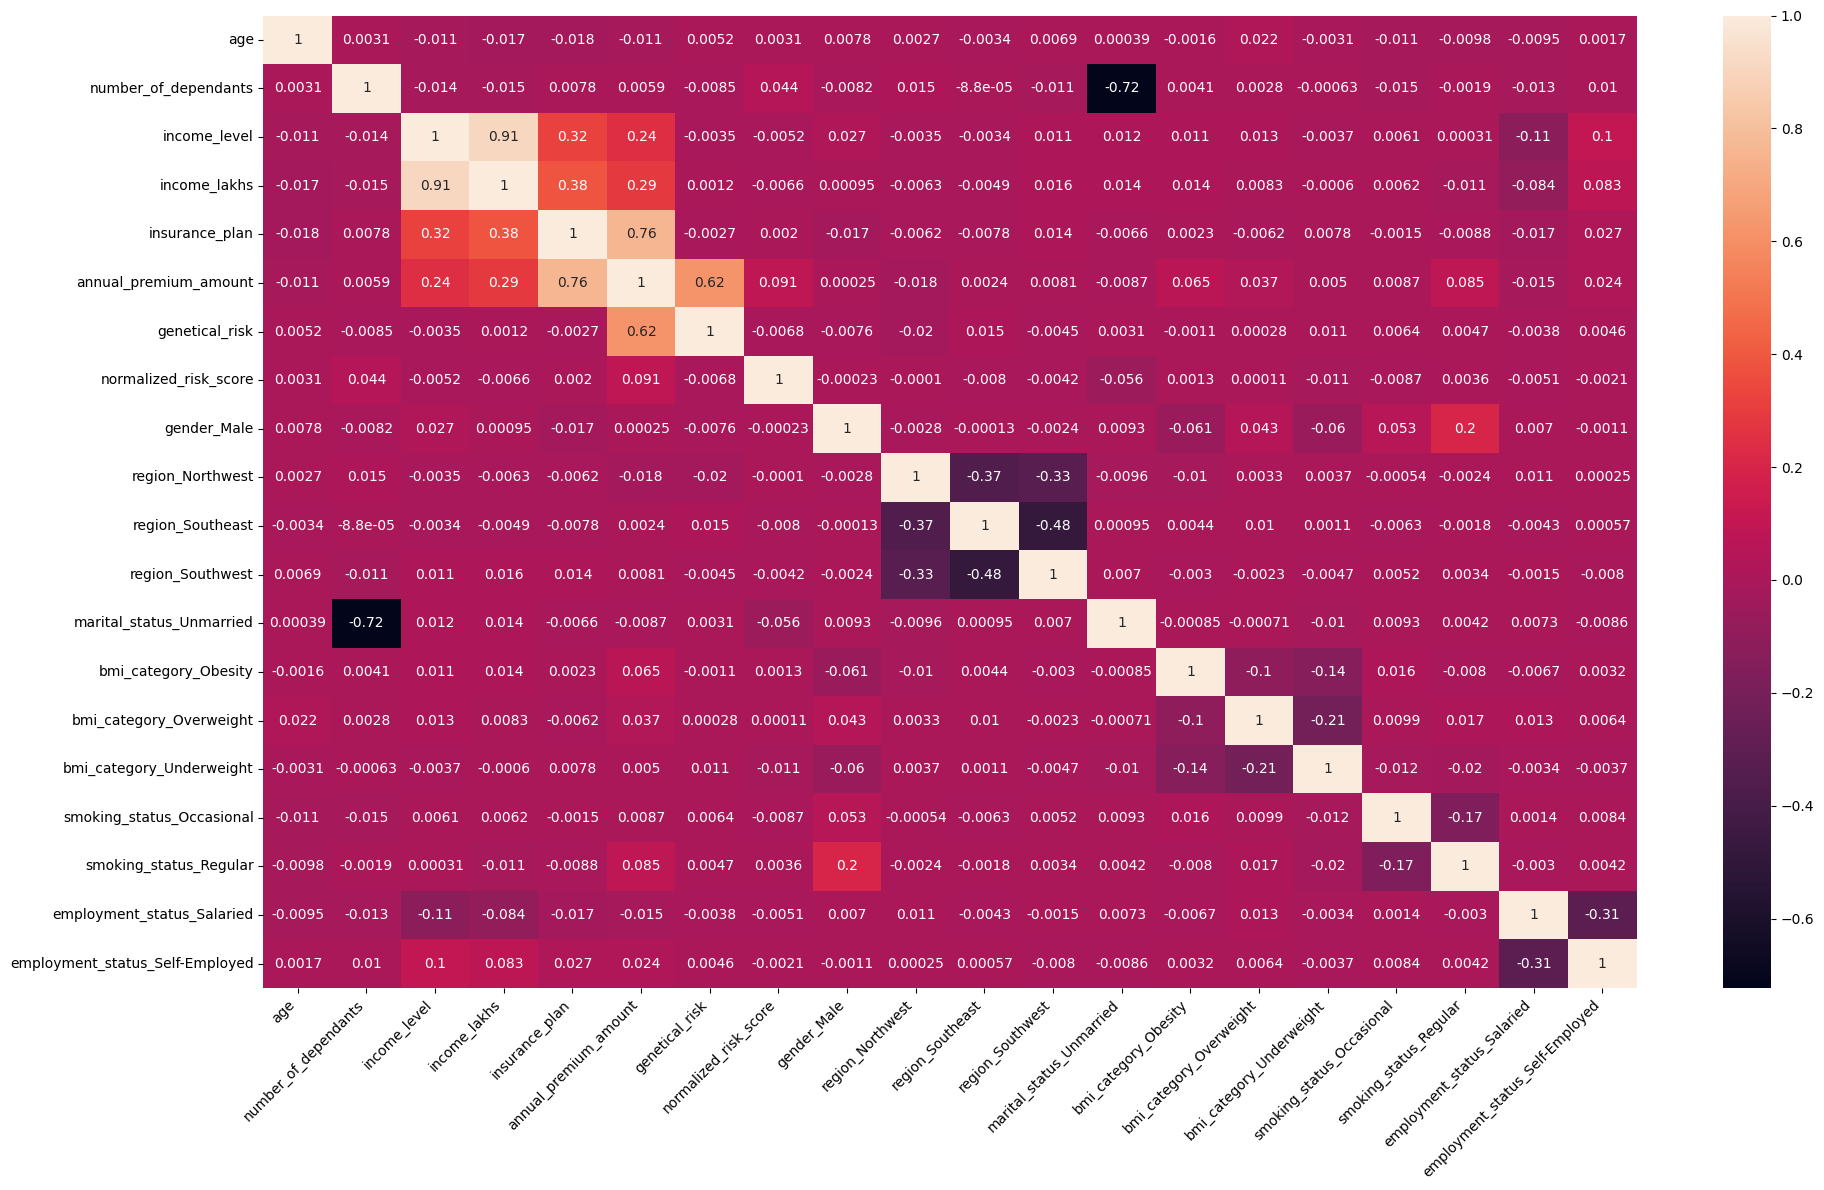

In [348]:
# check correlation
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [349]:
X = df4.drop('annual_premium_amount',axis=1)
y = df4['annual_premium_amount']

In [350]:
# scaling
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [351]:
# calculate vif to check multicollinearity among multiple variables together.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [352]:
calculate_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [353]:
# drop income_level column as VIF is high & now again check VIF
# VIF is dependent on other columns so again VIF get change after droping 1 column
calculate_vif(X.drop('income_level', axis="columns"))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [354]:
# storing X columns after scaling and VIF in new variable
X_reduced = X.drop('income_level', axis="columns")
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


<h2 align="center" style="color:red">Model Training</h2>

In [355]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3,random_state=10)
print('X train: ', X_train.shape)
print('X test: ', X_test.shape)
print('Y train: ', y_train.shape)
print('X test: ', y_test.shape)

X train:  (14060, 18)
X test:  (6026, 18)
Y train:  (14060,)
X test:  (6026,)


### Linear Regression Model

In [356]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
test_score = model_lr.score(X_train,y_train)
train_score = model_lr.score(X_test,y_test)
test_score, train_score

(0.988297900194864, 0.9887263253056615)

In [357]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  85732.34377930452 RMSE:  292.8008602776032


In [358]:
X_test.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12774,1.0,0.666667,0.040404,0.0,0.4,0.0,1,0,0,1,1,0,0,1,0,0,0,0


In [359]:
# y=mx+c here intercept is c
model_lr.intercept_

np.float64(3978.8235284382563)

In [360]:
# y=mx+c here coefficients are m1,m2....
model_lr.coef_

array([-7.22903185e+00,  1.95361819e+01, -1.26452776e+00,  7.00112526e+03,
        4.99698873e+03,  1.10914836e+03,  8.17798831e+00,  1.67735268e+00,
       -3.27532710e+00,  6.31709531e+00,  1.60689716e+01,  8.12844929e+02,
        4.00375598e+02,  1.07529819e+02,  2.05069661e+02,  6.10983280e+02,
        3.87836470e-02, -5.24201812e+00])

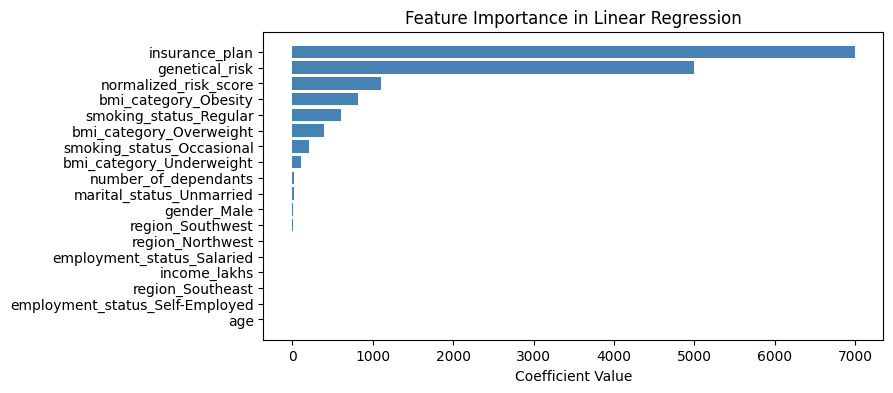

In [361]:
# will plot graph to see important features which will have higher weights
feature_importances = model_lr.coef_

# created dataframe to plot graph
coef_df = pd.DataFrame(feature_importances,index=X_test.columns,columns=['Coefficients'])

# Sorting coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Ridge Regression Model

In [362]:
from sklearn.linear_model import Ridge,Lasso

model_rg = Ridge(alpha=10)
model_rg.fit(X_train,y_train)
test_score = model_rg.score(X_train,y_train)
train_score = model_rg.score(X_test,y_test)
test_score, train_score


(0.9882386209794508, 0.9886848419551753)

In [363]:
y_pred = model_rg.predict(X_test)

mse_rg = mean_squared_error(y_test, y_pred)
rmse_rg = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_rg, "RMSE: ", rmse_rg)

Ridge Regression ==> MSE:  86047.81011671726 RMSE:  292.8008602776032


### XGBoost 

In [364]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
test_score = model_xgb.score(X_train,y_train)
train_score = model_xgb.score(X_test,y_test)
test_score, train_score

(0.9925054907798767, 0.987729549407959)

In [365]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBoost Regression ==> MSE: ", mse_xgb, "RMSE: ", rmse_xgb)

XGBoost Regression ==> MSE:  93312.703125 RMSE:  305.47128036036383


### Hyperparameter tuning 

In [366]:
from sklearn.model_selection import RandomizedSearchCV
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],          # number of trees the model builds
    'learning_rate': [0.01, 0.1, 0.2],     # how much each tree contributes to improving the model
    'max_depth': [3, 4, 5],                # maximum depth of each tree
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
# This line creates a RandomizedSearchCV object that tries 10 random hyperparameter combinations, 
# uses 3-fold cross-validation, evaluates with R² score, ensures reproducibility with random_state=42, 
# and uses all CPU cores (n_jobs=-1)

random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9879226088523865)

In [367]:
# best parameters
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [379]:
# all three model giving same accuracy so we choose linear regression as best model
best_model = model_lr

### Error Analysis

In [380]:
y_pred = best_model.predict(X_test)

residuals = y_pred-y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6121.456891,-116.543109,-1.868277
14758,9462,9601.797510,139.797510,1.477463
13205,5152,5611.056493,459.056493,8.910258
14278,6988,7423.486322,435.486322,6.231916
19351,4917,5112.056543,195.056543,3.966983


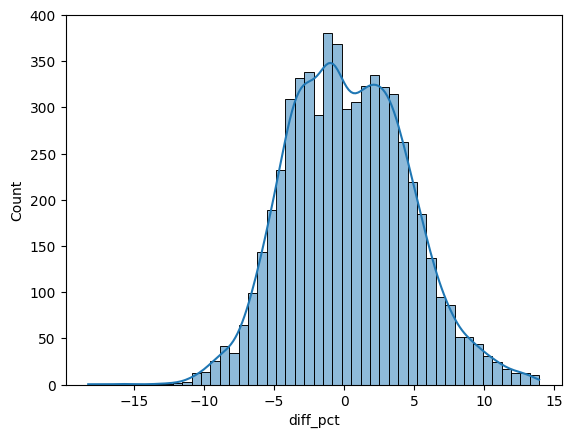

In [370]:
sns.histplot(results_df['diff_pct'],kde=True)
plt.show()

In [371]:
# getting rows where diff percent is more than 10 for both -ve and +ve rows.
extreme_error_threshold = 10   # we can adjust this threshold based on domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df.diff_pct) > extreme_error_threshold]
extreme_results_df.shape

(129, 4)

In [372]:
results_df.shape

(6026, 4)

In [373]:
# percentage of rows where error is more than extreme_error_threshold (10)
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

2.140723531364089

In [381]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.0,0.000000,0.0,0.0,0.0,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.0,0.151515,0.0,0.2,0.0,1,1,0,0,1,0,0,0,0,0,1,0


### Export the Model

In [382]:
from joblib import dump

dump(best_model, "artifacts/model_young.joblib") #saves our best model in artifacts folder with name model_young.joblib
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(scaler_with_cols, "artifacts/scaler_young.joblib") #saves our scaler objects and columns in artifacts folder with name scaler_young.joblib

['artifacts/scaler_young.joblib']